### The Python Debugger and the `pdb` Module

- There seem three usual ways to invoke `pdb`. 
    - One is to call `pdb.pm()` when program has crashed, it will enter post-mortem debugging of the traceback found in `sys.last_traceback`.
    - Another is to debug run a function or method using `pdb.run(statement, globals=None, locals=None)`.
        - Execute the `statement` (given as a string or a code object) under debugger control. The debugger prompt appears before any code is executed; you can set breakpoints and type continue, or you can step through the statement using `step` or `next` (all these commands are explained below). The optional `globals` and `locals` arguments specify the environment in which the code is executed; by default the dictionary of the module `__main__` is used.
    - Third one is to run as a script to debug other scripts: `python3 -m pdb myscript.py`.
        - It may need to put the function in the `__main__` section though.
        - When invoked as a script, pdb will automatically enter post-mortem debugging if the program being debugged exits abnormally. After post-mortem debugging (or after normal exit of the program), pdb will restart the program. Automatic restarting preserves pdb’s state (such as breakpoints) and in most cases is more useful than quitting the debugger upon program’s exit.
        
- Setting breakpoint is now the built-in `breakpoint()` function, rather than `import pdb; pdb.set_trace()`, at the location you want to break into the debugger, and then run the program. You can then step through the code following this statement, and continue running without the debugger using the `continue` command. See an example in this [post](https://www.evernote.com/shard/s191/nl/21353936/e9d44eed-b5ac-45b5-aa8e-a51537d17bf0?title=Python%203.7%E2%80%99s%20new%20builtin%20breakpoint%20%E2%80%94%20a%20quick%20tour%20%E2%80%93%20Hacker%20Noon).

- **Debugger Command**

    - **Entering a blank line repeats the last command entered**. Exception: if the last command was a list command, the next 11 lines are listed.
    - Commands that the debugger doesn’t recognize are assumed to be Python statements and are executed in the context of the program being debugged. Python statements can also be prefixed with an exclamation point (!). **This is a powerful way to inspect the program being debugged; it is even possible to change a variable or call a function**. When an exception occurs in such a statement, the exception name is printed but the debugger’s state is not changed.
    - Some useful commands
        - `h(elp)`: Without argument, print the list of available commands. With a command as argument, print help about that command. `help pdb` displays the full documentation (the docstring of the `pdb` module).
        - `w(here)`: Print a stack trace, with the most recent frame at the bottom. An arrow indicates the current frame, which determines the context of most commands.
        - `s(tep)`: Execute the current line, stop at the first possible occasion (either in a function that is called or on the next line in the current function).
        - `n(ext)`: Continue execution until the next line in the current function is reached or it returns. (The difference between `next` and `step` is that `step` stops inside a called function, while `next` executes called functions at (nearly) full speed, only stopping at the next line in the current function.)
        - `l(ist)`
            - List source code for the current file. Without arguments, list 11 lines around the current line or continue the previous listing. With `.` as argument, list 11 lines around the current line. With one argument, list 11 lines around at that line. With two arguments, list the given range; if the second argument is less than the first, it is interpreted as a count.
            - The current line in the current frame is indicated by `->`. If an exception is being debugged, the line where the exception was originally raised or propagated is indicated by `>>`, if it differs from the current line.
        - `ll`: List all source code for the current function or frame. Interesting lines are marked as for `list`.
        - `p expression`: Evaluate the expression in the current context and print its value, useful in inspecting variable values
        - `pp expression`: pretty print version of `p` above.

### Program Profiling

- `cProfile` and `profile` provide deterministic profiling of Python programs. A **profile is a set of statistics that describes how often and for how long various parts of the program executed**. These statistics can be formatted into reports via the `pstats` module.

- The Python standard library provides two different implementations of the same profiling interface:

    - `cProfile` is recommended for most users; it’s a `C` extension with reasonable overhead that makes it suitable for profiling long-running programs.

    - `profile`, a pure Python module whose interface is imitated by cProfile, but which adds significant overhead to profiled programs. If you’re trying to extend the profiler in some way, the task might be easier with this module. 
    
- Columns in the resulting table are as follows.

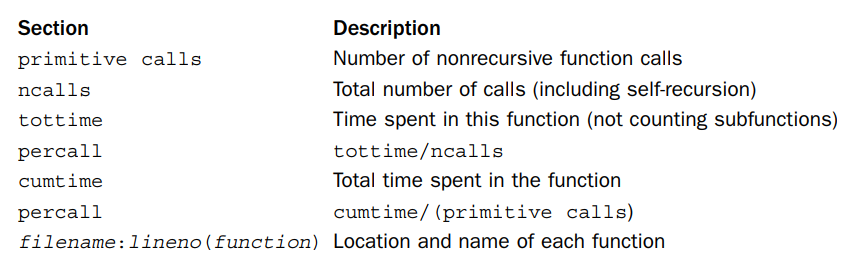

- When there are two numbers in the first column (for example, "121/1"), the latter is the number of primitive calls and the former is the actual number of calls.

### Tuning and Optimization

#### Making Time Measurements

- If you have a block of long-running statements you want to time, you can either insert calls to `time.clock()` to get a current reading of the **elapsed CPU time** or calls to `time.time()` to read the **current wall-clock time**.
-  If you have a fine-grained statement you want to benchmark, you can use the `timeit(code [, setup])` function in the `timeit` module.
    - The first argument to `timeit()` is the code you want to benchmark.
    - The second argument is a statement that **gets executed once in order to set up the execution environment**.
- The `timeit` module also has a function `repeat()` that can be used to make measurements. This function works the same way as `timeit()` except that it repeats the **timing measurement three times and returns a list of the results**.

#### Making Memory Measurements
- The `sys` module has a function `getsizeof()` that can be used to investigate the **memory footprint (in bytes) of individual Python objects**. 
    - **Caveat**: For containers such as lists, tuples, and dictionaries, the size that gets reported is **just for the container object itself, not the cumulative size of all objects contained inside of it**.
    - Be aware that the `getsizeof()` function is **only going to give you a rough idea of overall memory** use for various objects. 
        - Internally, the interpreter **aggressively shares objects via reference counting** so the actual memory consumed by an object might be far less than you first imagine.
        - Given that **C extensions to Python can allocate memory outside of the interpreter**, it may be difficult to precisely get a measurement of overall memory use.

#### Tuning Strategies

- Analyze your algorithm: use **more-efficient big-O algorithms**.

- Use **built-in types**, including those in `collections`.

- Any time you add an **extra layer of abstraction or convenience to an object or a function, you will slow down your program**. However, there is also a trade-off between usability and performance.

- If all you are doing is building a simple data structure for storing data, **a dictionary may be a more efficient choice than defining a class, as classes are built using dictionaries and add overhangs**.

- `__slots__` can be used for performance boost; see [g-classes-and-object-oriented-programming](g-classes-and-object-oriented-programming.ipynb).

- **Tradeoff in the `.` operator**
    - Whenever you use the (`.`) to look up an attribute on an object, it always involves a name lookup.
    - For calculations involving heavy use of methods or module lookups, it is **almost always better to eliminate the attribute lookup by putting the operation you want to perform into a local variable first**, e.g. `'from math import sqrt'` and `'sqrt(x)'` rather than typing `'math.sqrt(x)'`.
    - Obviously you should not try to eliminate attribute lookups everywhere in your program **because it will make your code very difficult to read**. However, for performance-critical sections, this is a useful technique.
    
- Setting up a `try` block for code that normally doesn’t raise an exceptions runs more quickly than executing an `if` and `raise` statement. So be diligent in setting up `try` block for uncommon cases.

- `d[key] if key in d else None` runs twice as fast as `d.get(key, None)`, since **the `in` operator is faster than a method call**.

- **List comprehensions, generator expressions, generators, coroutines, and closures are much more efficient** than most Python programmers realize.
    - These operations also run much more quickly than legacy Python code that uses functions such as `map()` and `filter()`. [< Effective Python >](https://www.evernote.com/shard/s191/nl/21353936/80774c17-012b-c7d8-e425-a9b3eb0d55f3?title=Effective%20Python) also advocates using list comprehensions for cleaner codes.
    - Generators can be used to write code that not only runs fast, but **which makes efficient use of memory**. 
    
- Since **decorators and meta classes operate at the time of function or class definition**, they can be used in ways that lead to improved performance - especially if a program has many optional features that might be turned on or off.

## References
- [Python `pdb` module document](https://docs.python.org/3/library/pdb.html)
- [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References), Chapter 11.